**Akshay kumar singh**  [Akshay](https://kakshaycs.github.io/)<br>
Dets (Kalyani University)<br>
Recommender system notebook<br>
**Dataset** :- Million Song Dataset Challenge Kaggle <br>
Github link : [Note book](https://github.com/kakshaycs/RecommendSystem)


### **A recommender system or a recommendation system (sometimes replacing "system" with a synonym such as platform or engine) is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.They are primarily used in commercial applications bold text** <br>
In this system we have a large no of user vs Song Id data where, users rated more than one song according to their preference and system will find some ralation between more than one user and more than one songs and find a abstract function that can try to predict ration for a song which are not rated by user and according to the rating we will recommend those songs to same user.that may like according to their activity of rating 

In [0]:
# Importing Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output
from random import uniform
import time
from random import randint
np.set_printoptions(precision=4)
import random
import time

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#loading data
data=pd.read_csv("drive/My Drive/Colab Notebooks/Recommended System/songsDataset.csv")

In [0]:
data.head()

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [0]:
# change column name
data.columns=['userID','songID','rating']
data.shape

(2000000, 3)

Text(0.5, 1.0, 'Distribution of rating')

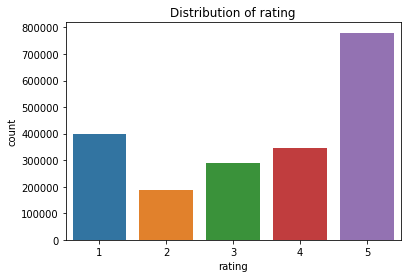

In [0]:
sns.countplot(x='rating',data = data)
plt.title('Distribution of rating')

The distribution says that most user rate 5 and second m

In [0]:
# the no of user and Movie

print("Total no of User:- ",len(set(data['userID'])))
print("Total no of Songs",len(set(data['songID'])))

Total no of User:-  200000
Total no of Songs 127771


In [0]:
# this is the Rating matrix that contain column is user and rows is movies
"""    | movie1 | movie2 | movie3 
 user1  |   5    |    4   |    1
 user2  |   3    |        |    5
 user3  |   5    |    3   |    
  
"""
# the R matrix is boolean matrix that denote user rated that movie or not
print()

There are 127771 users which have rated a least one song with (0-5) rating parameter. And there are 200000 songs that is rated by the users.<br>
This system is using **Matrix factorization** technique to predict songs for particular user which haven't rated those songs.<br>
# Matrix factorization

![alt text](https://cdn-images-1.medium.com/max/1600/1*Zhm1NMlmVywn0G18w3exog.png)

###**The above image does an excellent job of summarizing, the core idea behind matrix factorization. Let there be matrix A with dimensionality of (m,n) this matrix can be viewed as a dot product between two matrix with each matrices having dimensions of (m,k) and (k,n).**

##Matrix factorization is a class of collaborative filtering algorithms used in recommender systems. Matrix factorization algorithms work by decomposing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices.<br>

---

If we use matrix method to store the rating so it take 127771 * 200000 <br>
Total entry is about **25554200000**.which will take about **95 GB** of RAM if we load the whole matrix at a time in RAM. Is very difficult to handle so much large data.
So, there are several aternative to take of these problem<br>

1.   Read in a chunk
2. Process the chunk
3. Save the results of the chunk
4. Repeat steps 1 to 3 until we have all chunk results
5. Combine the chunk results

But as a good knowledge of Alorithm and datastructure we will take care which out using any type of chunk. we store the matrix in Dictionary. Because, given matrix is sparse matrix and we need to handle only 2000000 of user and songs combination so Dictionary will play a important role.

In [0]:
Rating = dict()
for i in range(2000000):
  Rating[(data['userID'][i],data['songID'][i])] = data['rating'][i]
  if i%100000==0:
    clear_output(wait=True)
    print("complete :- ",i/(20000))

complete :-  95.0


We don't know about the features of different songs and what type of songs a user like and dislike. We have only rating by a users <br>
Lets sppose ***user 1*** give 5 start to ***song x*** and <br>
 ***user 2*** also give 5 star to ***song x***<br>,so by only two rating we can conclude that somehow ***user 1*** and ***user 2*** have similar interest.<br>
 And if ***user 1*** rated a ***song y*** to 4 star, So there is large probability that ***user 2*** will also rated ***song y*** to 4 
 

---

So that we assume some features of songs, on the basis of that features a user will predict its rating.<br>
Only asigning features for a song will not help much but we have also some parameters that for a user too.<br>
Both the feature of the songs and parameters of a user can solve our problem.<br>
And one more things both the parameter and the feature are same in numbers but may different in values.<br>
We assigning 5 features for songs and 5 parameters for a user and set a small random value for both features and parameters

example:-           

1.   melody
2.   romance
3. Rock
4. pop
5. classic

***We will assign a random value for each categories in User And Songs Features***


---


Total no of User is 200000 and Songs is 127771 <br> 
So we create two matrix    USER (200000  ,  5) and Song  (127771, 5)

In [0]:
def randomR():
  return round(randint(0,100)/randint(200,300),3)

**Assigning Random variable to the features and parameters**

In [0]:

USERS = np.array([[randomR() for i in range(5)] for i in range(200002)],dtype=np.float128)
SONGS = np.array([[randomR() for i in range(5)] for i in range(127773)],dtype=np.float128)

***OUR GOAL***

We need to find dot product of the features and parameters of a user and a songs to find approximate rating, and accoring to the error we got, we will modify the both features and parameters .<br>
We will repeat this step until the error will minimize<br>
After the minimization of error we got some specific value in features and parameters. And that help to predict the unrated songs.

### SPLIT DATASET
we have datas, store in dictionary. So,and they must be split in two dictionary one is Train set and another is Test set <br>
Train set is used to train the model for each Users and Songs, and <br>
Test set is used to calcutale the Accuracy of the model .

In [0]:
def splitTrainTest(Dic,x):
    S=list(range(len(Dic)))
    S=set(random.sample(S,int(len(Dic)*x)))
    TrainR={}
    TestR={}
    index=0
    for i in Dic:
        if index in S:
            TestR[i] = Dic[i]
        else:
            TrainR[i] = Dic[i]
        index+=1
    return TrainR,TestR

In [0]:
TrainSet,TestSet = splitTrainTest(Rating,0.3)

In [0]:
len(TrainSet),len(TestSet)

(1400000, 600000)

###index in Dictonary are ids
Indexof dictionary are UserID and SongID but index in parameter and features are integer so we must have to built a hash function with track the record of index with IDs<br>


In [0]:
# Indexing for each USERS and SONGS
User=list(set(data['userID']))
Song=list(set(data['songID']))
U=dict()
S=dict()
for i in range(len(User)):
    U[User[i]]=i
for i in range(len(Song)):
    S[Song[i]]=i


In [0]:
# set parameters and learning rate
alpha = 0.01
lamda = 0.03


In [0]:
def Test():
    Accuracy=0
    n=len(TestSet)
    for x in TestSet:
        i=U[x[0]]
        j=S[x[1]]
        d= sum(USERS[i,:] * SONGS[j,:])- Rating[x]
        Accuracy += d**2
    return  (Accuracy/n)**(0.5)


In [0]:
def Train():
    Accuracy=0
    n=len(TrainSet)
    for x in TrainSet:
        i=U[x[0]]
        j=S[x[1]]
        d= sum(USERS[i,:] * SONGS[j,:])- Rating[x]
        Accuracy += d**2
    return (Accuracy/n)**(0.5)

In [0]:
#learning with collaborating Filtering
USERS = np.array([[randomR() for i in range(5)] for i in range(200002)],dtype=np.float128)
SONGS = np.array([[randomR() for i in range(5)] for i in range(127773)],dtype=np.float128)
E=[]
Et=[]
tm=0
n=len(TrainSet)
for itr in range(25):
    #error=0
    t=time.time()
    for x in TrainSet:
        i=U[x[0]]
        j=S[x[1]]
        USERS[i,:] =  USERS[i,:] - alpha * (  (sum(USERS[i,:] * SONGS[j,:]) - Rating[x]) * SONGS[j,:] + lamda * USERS[i,:] )
        SONGS[j,:] = SONGS[j,:] - alpha * (  (sum(USERS[i,:] * SONGS[j,:]) - Rating[x]) * USERS[i,:] + lamda * SONGS[j,:] )
    
    TestError=Test()
    TrainError=Train()
    E.append(round(TrainError,4))
    Et.append(round(TestError,4))
    tm=max(tm,time.time()-t)
    #clear_output(wait=True)
    print("Iteration = ",itr+1," Time= ",round(tm),"Error :- ",round(TrainError,4)," Test :-",round(TestError,4))


Iteration =  1  Time=  48 Error :-  2.7643  Test :- 2.833
Iteration =  2  Time=  48 Error :-  2.2935  Test :- 2.4178
Iteration =  3  Time=  48 Error :-  2.0027  Test :- 2.1678
Iteration =  4  Time=  48 Error :-  1.8  Test :- 1.9993
Iteration =  5  Time=  48 Error :-  1.6505  Test :- 1.8789
Iteration =  6  Time=  48 Error :-  1.537  Test :- 1.7903
Iteration =  7  Time=  48 Error :-  1.4492  Test :- 1.7235
Iteration =  8  Time=  48 Error :-  1.3801  Test :- 1.6724
Iteration =  9  Time=  48 Error :-  1.3244  Test :- 1.6328
Iteration =  10  Time=  48 Error :-  1.2785  Test :- 1.6016
Iteration =  11  Time=  48 Error :-  1.2396  Test :- 1.5769
Iteration =  12  Time=  48 Error :-  1.2056  Test :- 1.5572
Iteration =  13  Time=  48 Error :-  1.1751  Test :- 1.5415
Iteration =  14  Time=  48 Error :-  1.1471  Test :- 1.529
Iteration =  15  Time=  48 Error :-  1.1211  Test :- 1.5192
Iteration =  16  Time=  48 Error :-  1.0966  Test :- 1.5116
Iteration =  17  Time=  48 Error :-  1.0734  Test :- 1.

**This graph shows the rate of learning with respect to the no of iteration**<br>
Orange line shows RMSE with Train data<br>
Blue line shows RMSE with Test Data

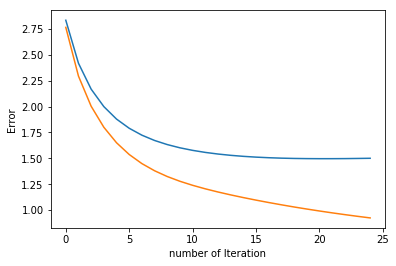

In [0]:
plt.plot(Et)
plt.plot(E)
plt.xlabel("number of Iteration")
plt.ylabel("Error")
plt.show()

We will observe that now if we increase the no of iteration then Training error will decrease but Test error will be static <br>
After iteration 10 the Test Error have Straight line w.r.t iteration so in no need to increase iteration <br>


## Test the result
we have build the model, and this is the right time to display the acuracy 

In [0]:
# Using RMSE
Accuracy=0
n=len(TrainSet)
for x in TrainSet:
    i=U[x[0]]
    j=S[x[1]]
    d= sum(USERS[i,:] * SONGS[j,:])- Rating[x]
    Accuracy += d**2
print("RMSE :- ",(Accuracy/n)**(0.5))

RMSE :-  0.92482170645869723753


In [0]:
# Using RMSE
Accuracy=0
predictR=[]
n=len(TestSet)
for x in TestSet:
    i=U[x[0]]
    j=S[x[1]]
    d= sum(USERS[i,:] * SONGS[j,:])- Rating[x]
    predictR.append(sum(USERS[i,:] * SONGS[j,:]))
    Accuracy += d**2
print("RMSE :- ",(Accuracy/n)**(0.5))

RMSE :-  1.5005492893788656169


In [0]:
predictR[0:10]

[4.521830219783557651,
 4.8078171910662693333,
 4.851854129331954828,
 3.908037156929908814,
 3.7280150534265401566,
 3.014721754241196485,
 2.9695618610390433294,
 4.180675147479231667,
 2.9501643765291833002,
 3.4469304312152558303]

## Lets Recommend some songs for a user


we choose random user and Reccomend the 10 songs on the basis of there interest

In [0]:

P=[]
i=U[random.choice(User)]
for x in range(127771):
    j=S[Song[x]]
    P.append(sum(USERS[i,:] * SONGS[j,:]))
Result=pd.DataFrame({"Songs":Song,"Prediction":P})
bins = pd.cut(Result['Prediction'], [0, 1.5, 2.5, 3.5, 4.5,6],labels=[1,2,3,4,5])
Result["rating"]=bins
    

In [0]:
Result.sample(10)


,Songs,Prediction,rating
127725,136689,0.938648,1
26599,28414,2.695108,3
36031,38524,1.511098,2
99738,106721,1.510433,2
123148,131781,0.946126,1
108532,116129,2.439266,2
73297,78459,2.204791,2
15272,16335,0.743670,1
56504,60480,2.013584,2
54160,57970,0.640256,1


**We will find songs which is maximum Rated by user and recommend to that User**

## rough work